In [8]:
import numpy as np

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
# Architecture du réseau
model = Sequential()

# Couches de neurones
model.add(Dense(3, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/home/savoyarde/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

## On définie les valeurs des couches (poids, biais)

In [11]:
# Couche 0
coeff = np.array(
    [
        [1., 3., -5], 
        [2., -4., -6]
    ]
)
bias = np.array([-1, 0, 1.])
weights = [coeff, bias]

model.layers[0].set_weights(weights)

# Couche 1
coeff = np.array([[1.0], [1.0], [1.0]])
bias = np.array([-3])
weights = [coeff, bias]

model.layers[1].set_weights(weights)

In [12]:
# Poids de la couche 1 - et 2 [coefficients, biais]

poidscouche1 = model.layers[0].get_weights()
poidscouche2 = model.layers[1].get_weights()

print(poidscouche1)
print(poidscouche2)

[array([[ 1.,  3., -5.],
       [ 2., -4., -6.]], dtype=float32), array([-1.,  0.,  1.], dtype=float32)]
[array([[1.],
       [1.],
       [1.]], dtype=float32), array([-3.], dtype=float32)]


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


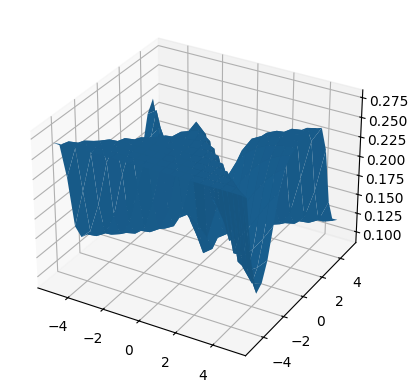

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

VX = np.linspace(-5, 5, 20)
VY = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(VX, VY)
entry = np.c_[X.ravel(), Y.ravel()]

sortie = model.predict(entry)
Z = sortie.reshape(X.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()